In [34]:
import pandas as pd
from collections import Counter
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline


train = pd.read_csv('train.csv')
#print(train.shape)

x = train.drop('label', axis=1).as_matrix()
t = train['label'].as_matrix()

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.8, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)

/Users/okihayas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/okihayas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(33600, 784)
(8400, 784)


In [35]:
x_train = x_train.reshape(33600, 28, 28)
x_train.shape

(33600, 28, 28)

In [28]:
label = train['label']
Counter(label)

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

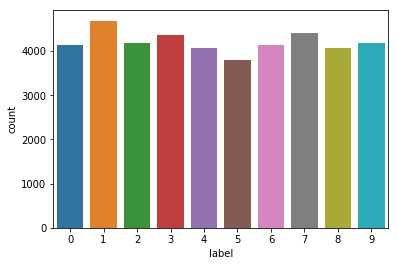

In [29]:
sns.countplot(label)

In [31]:
import sys, os
#sys.path.appened(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

x_train, t_train = x_train[:5000], t_train[:5000]

max_epochs = 20

network = SimpleConvNet(input_dim=(33600,1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000, verbose=False)

trainer.train()

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

ValueError: not enough values to unpack (expected 4, got 3)